DARAM CHARAN TEJA

# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Visualization

<AxesSubplot:xlabel='job', ylabel='count'>

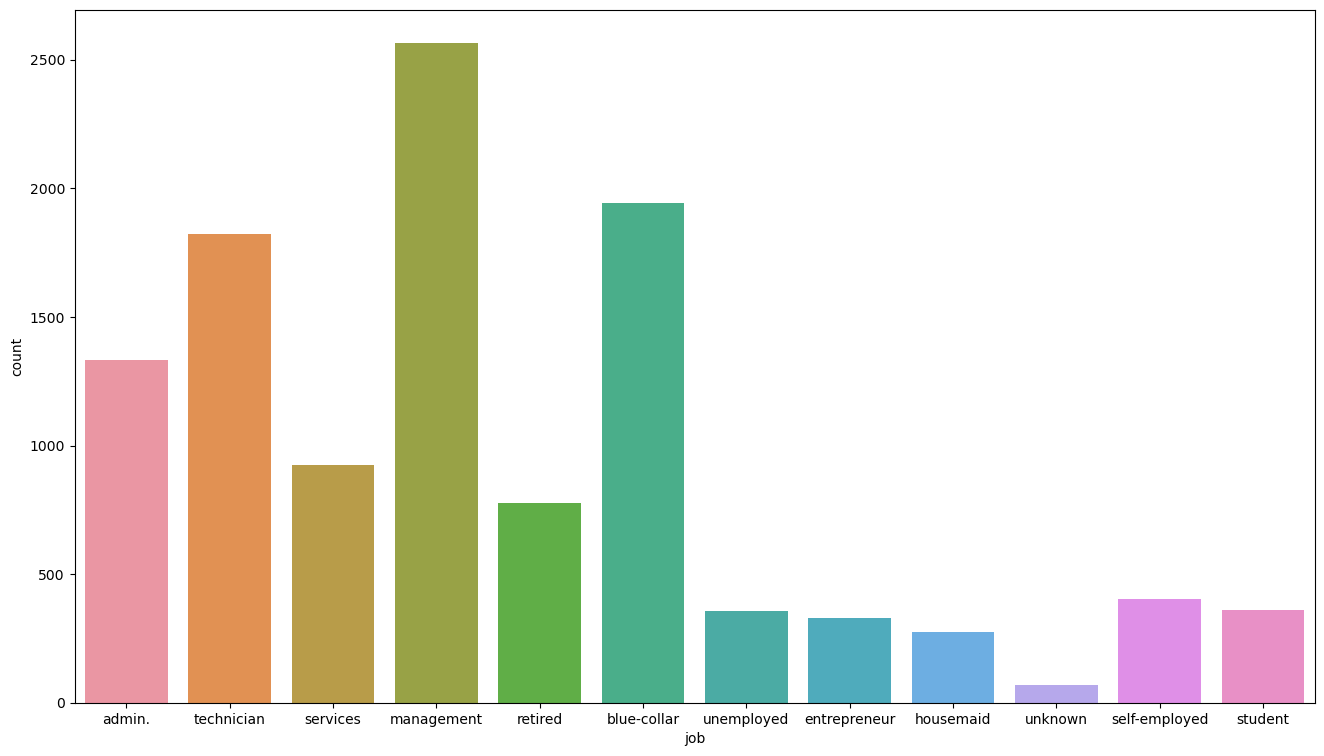

In [ ]:
plt.figure(figsize = (16,9))
sns.countplot(x = "job",data = df)


<AxesSubplot:xlabel='job', ylabel='count'>

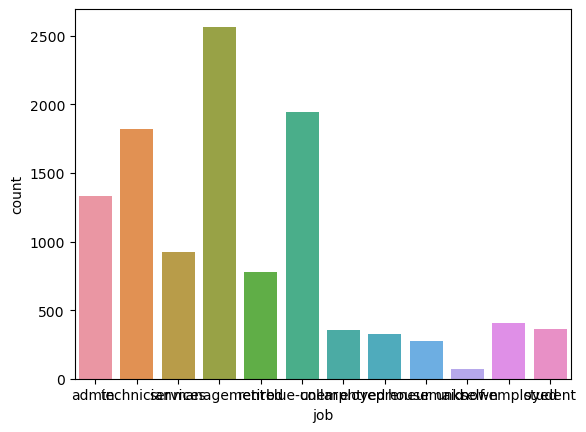

In [ ]:
sns.countplot(x = "job",data = df)

<AxesSubplot:xlabel='marital', ylabel='count'>

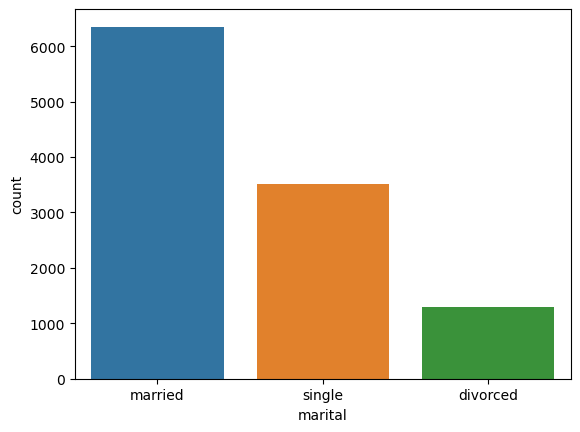

In [ ]:
sns.countplot(x = "marital",data = df)

<AxesSubplot:xlabel='education', ylabel='count'>

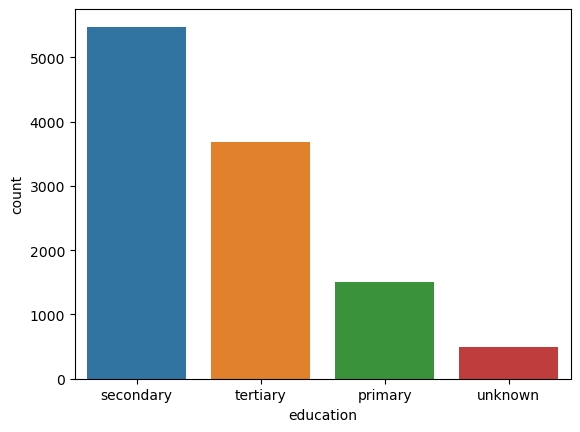

In [ ]:
sns.countplot(x = "education",data = df)

<AxesSubplot:xlabel='deposit', ylabel='count'>

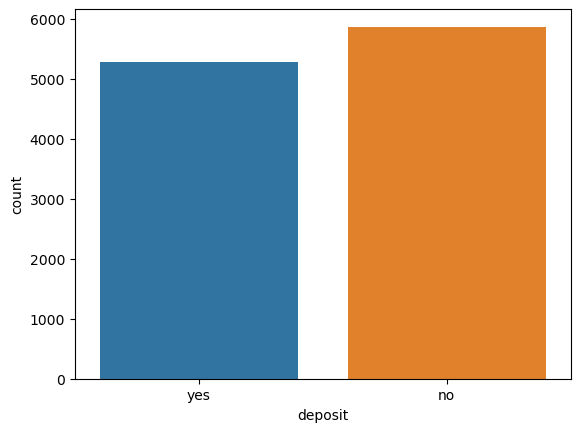

In [ ]:
sns.countplot(x = "deposit",data = df)

<AxesSubplot:xlabel='default', ylabel='count'>

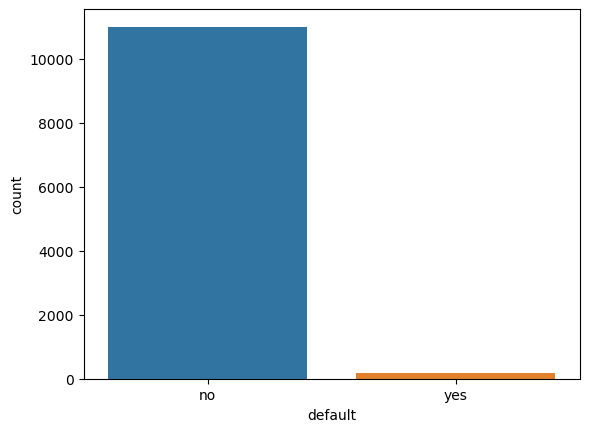

In [ ]:
sns.countplot(x = "default",data = df)

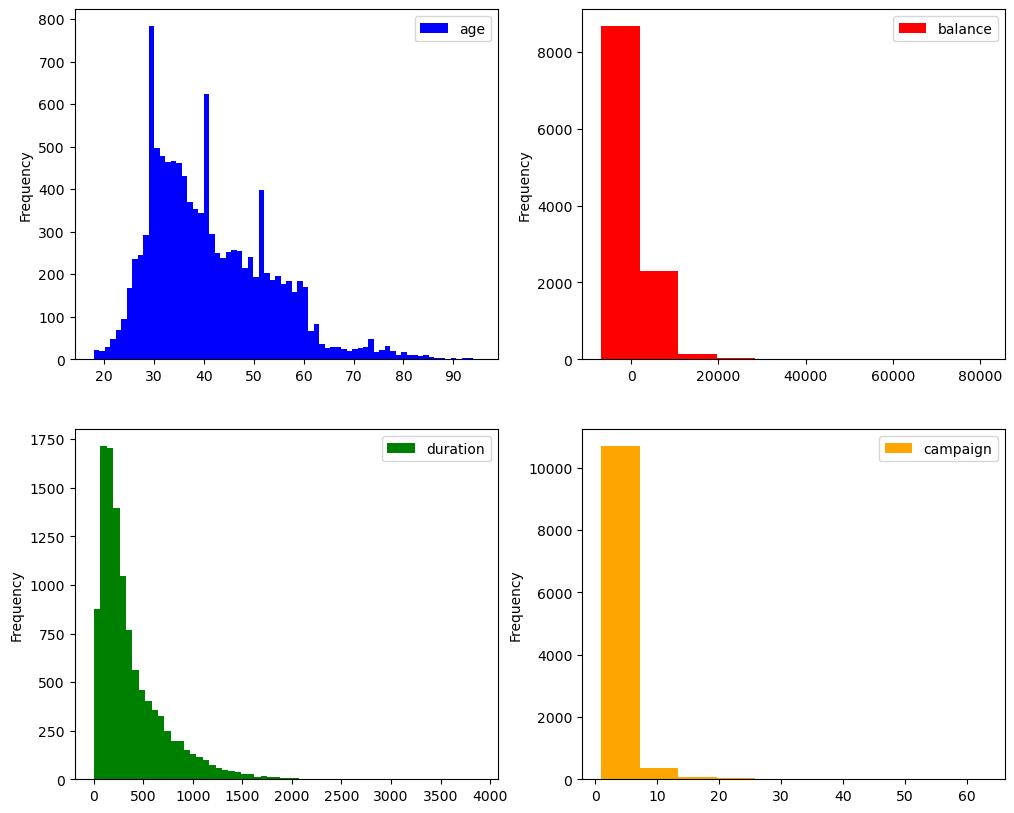

In [ ]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (12,10))
df.plot(kind = "hist",y = "age",bins = 70,color = "blue",ax = axes[0][0])
df.plot(kind = "hist",y = "balance",bins = 10,color = "red",ax = axes[0][1])
df.plot(kind = "hist",y = "duration",bins = 60,color = "green",ax = axes[1][0])
df.plot(kind = "hist",y = "campaign",bins = 10,color = "orange",ax = axes[1][1])
plt.show()

<Figure size 1600x900 with 0 Axes>

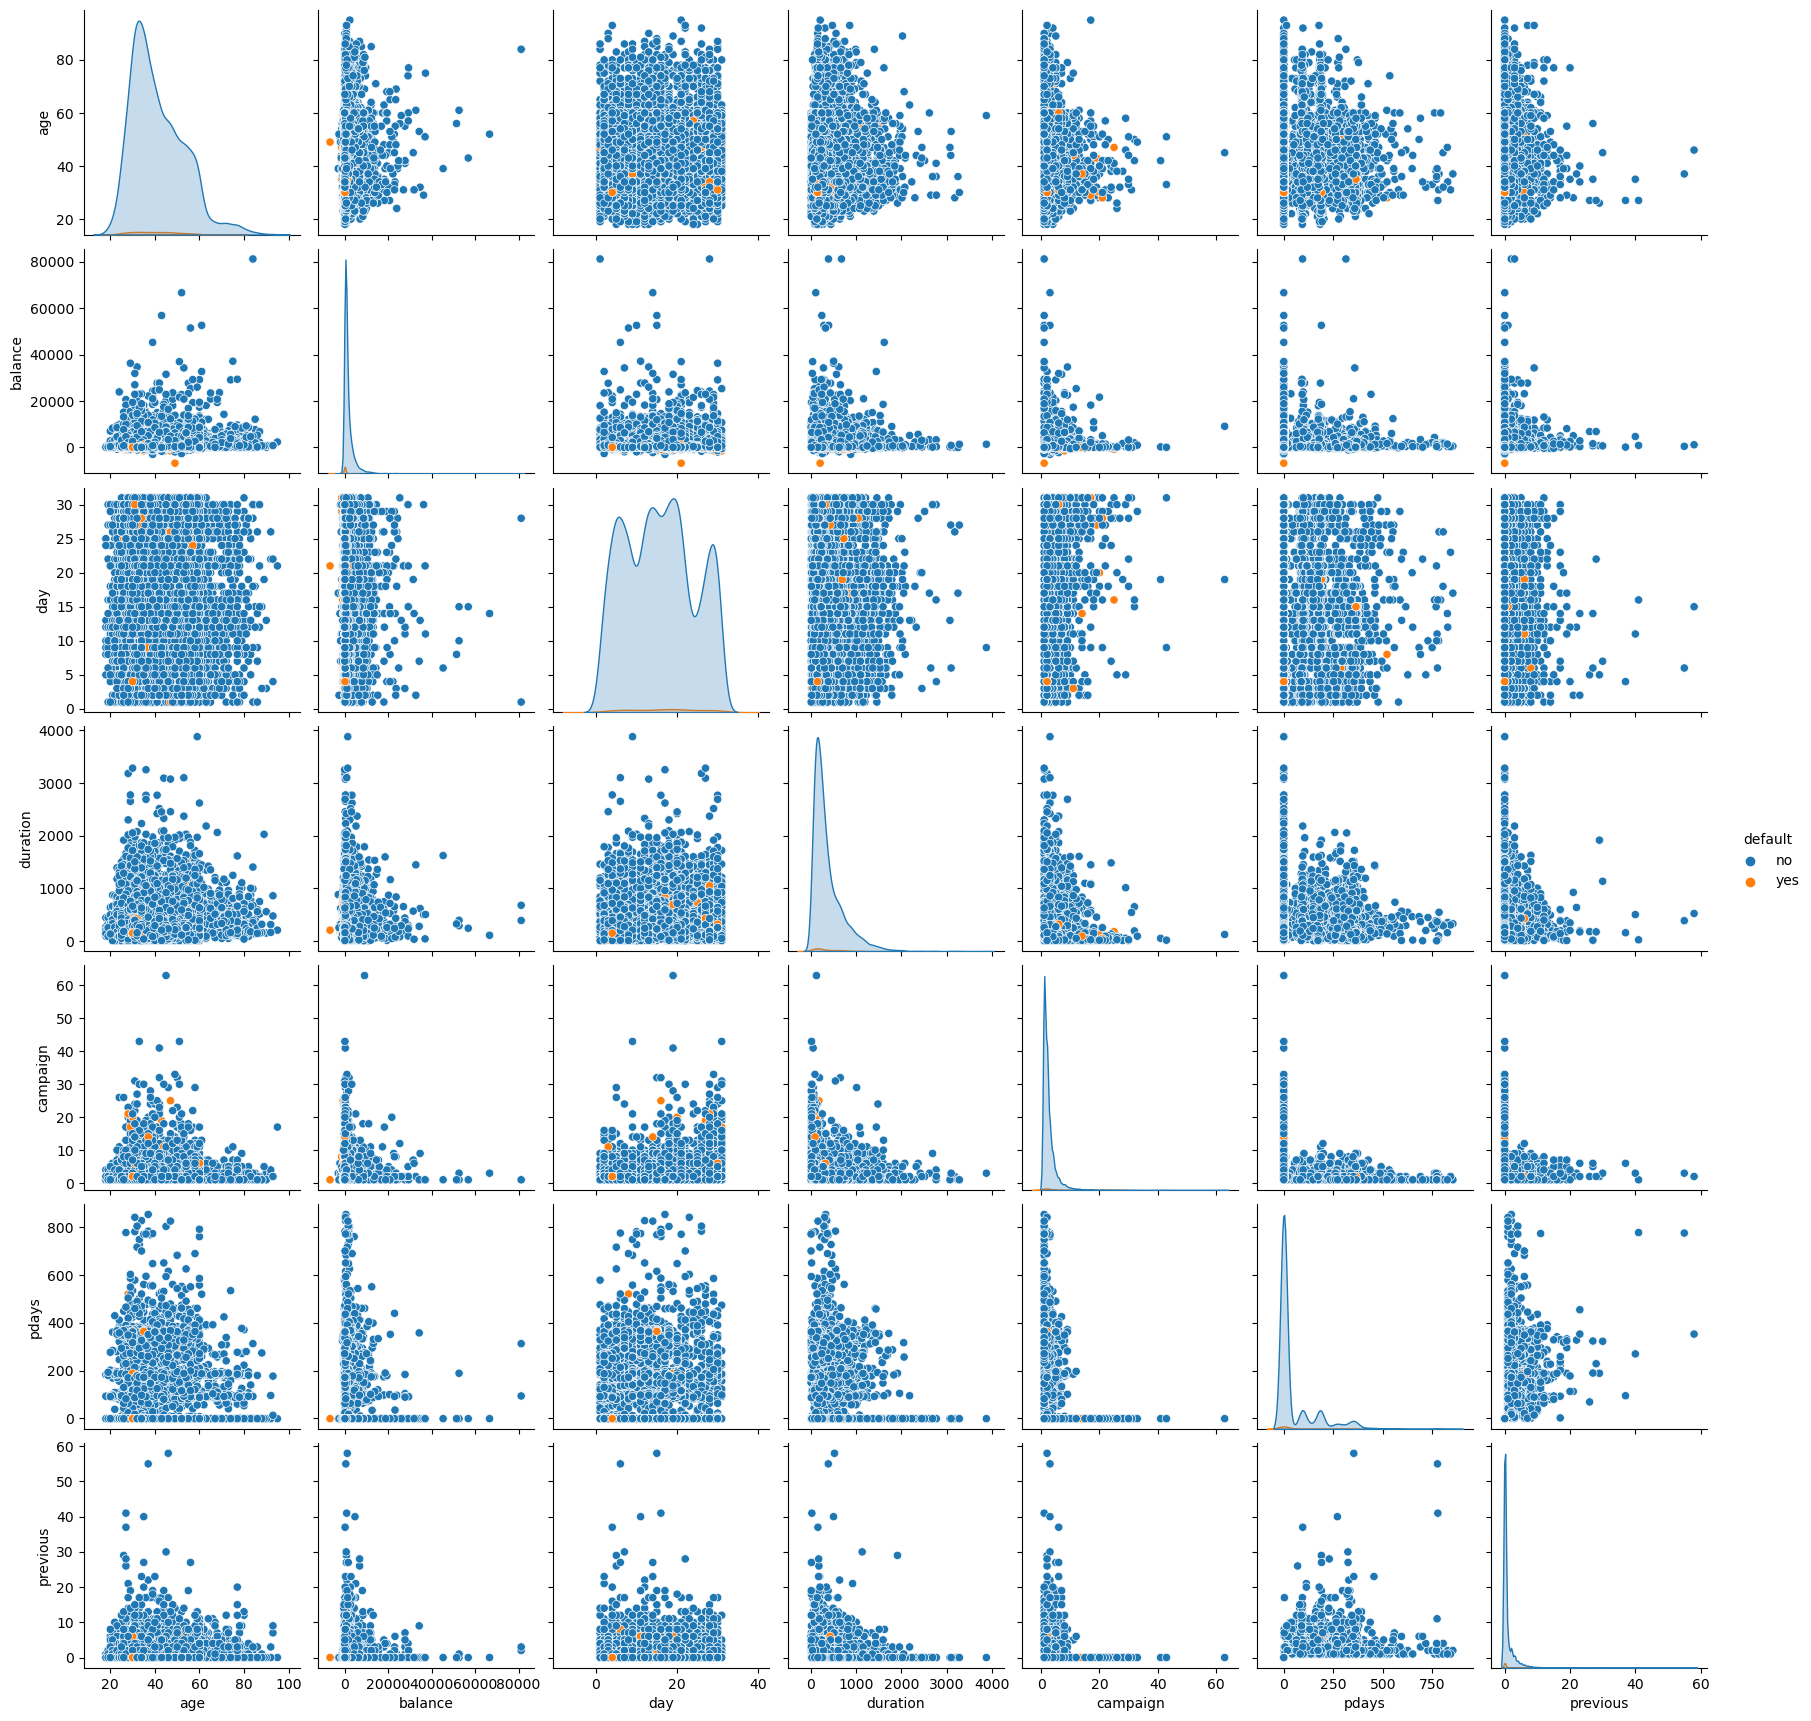

In [ ]:
plt.figure(figsize = (16,9))
sns.pairplot(data = df,hue = "default")

In [ ]:
my_df=df.select_dtypes(exclude=[object])

In [ ]:
my_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


<AxesSubplot:>

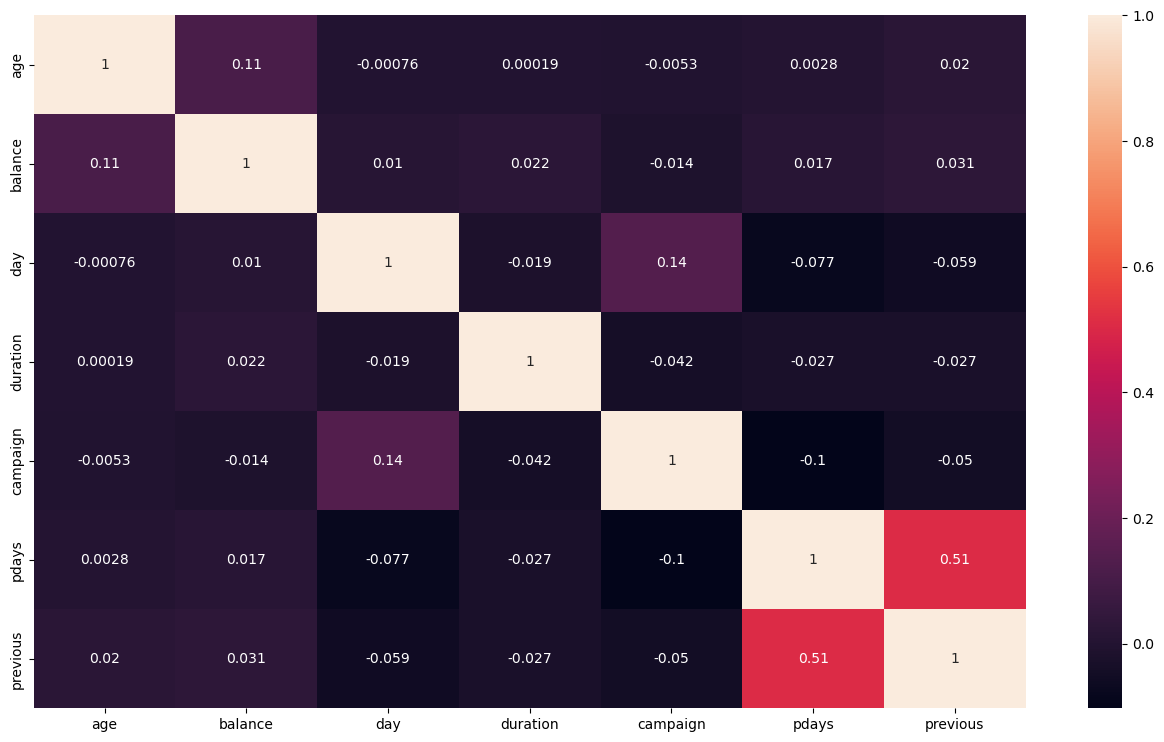

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(my_df.corr(),annot = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["deposit"] = le.fit_transform(df["deposit"])
df["default"] = le.fit_transform(df["default"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["poutcome"] = le.fit_transform(df["poutcome"])
df["housing"] = le.fit_transform(df["housing"])
df["month"] = le.fit_transform(df["month"])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
df.drop(["pdays","previous","poutcome"],axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
x = df.drop(["default"],axis = 1)
y = df["default"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


In [ ]:
x_train.shape

(7813, 16)

In [ ]:
x_test.shape

(3349, 16)

In [ ]:
y_train.shape


(7813,)

In [ ]:
y_test.shape


(3349,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()


In [ ]:
dc.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = dc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
acc = accuracy_score(y_pred,y_test)*100
print("Accuracy Score :",acc)

Accuracy Score : 97.16333233801134


In [ ]:
cm = confusion_matrix(y_pred,y_test)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[3249   48]
 [  47    5]]
